In [109]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(1234)

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [110]:
#Load the data and view it to determine ind and dep variables
#file<-"D:/Data/TrainExer13.csv"
#file <-"D:/Data/SalesPrice.csv"
file<-"D:/Data/TestExer1.csv"

df=read.csv(file)

str(df)
df<-cleanit(df)
str(df)

# count blanks remove blanks
#barplot(colSums(!is.na(df)))
colSums(!is.na(df)) ## Count blanks
#df <- na.omit(df) ## THis will remove blanks

'data.frame':	20 obs. of  3 variables:
 $ Observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Advertising: int  12 12 9 11 6 9 15 6 11 16 ...
 $ Sales      : int  24 27 25 27 23 25 27 25 26 27 ...
'data.frame':	20 obs. of  3 variables:
 $ observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ advertising: int  12 12 9 11 6 9 15 6 11 16 ...
 $ sales      : int  24 27 25 27 23 25 27 25 26 27 ...


observation advertising       sales 
         20          20          20

In [111]:
#Set dep and indep vars
df$ind<-df$advertising
df$dep<-df$sales
df$logdep<-log(df$dep)

#View summary 
summary(cbind(indep=df$ind,dep=df$dep,logdep=df$logdep))

     indep            dep            logdep     
 Min.   : 6.00   Min.   :23.00   Min.   :3.135  
 1st Qu.: 8.00   1st Qu.:24.00   1st Qu.:3.178  
 Median :11.00   Median :25.00   Median :3.219  
 Mean   :10.25   Mean   :26.30   Mean   :3.254  
 3rd Qu.:12.00   3rd Qu.:26.25   3rd Qu.:3.268  
 Max.   :16.00   Max.   :50.00   Max.   :3.912  

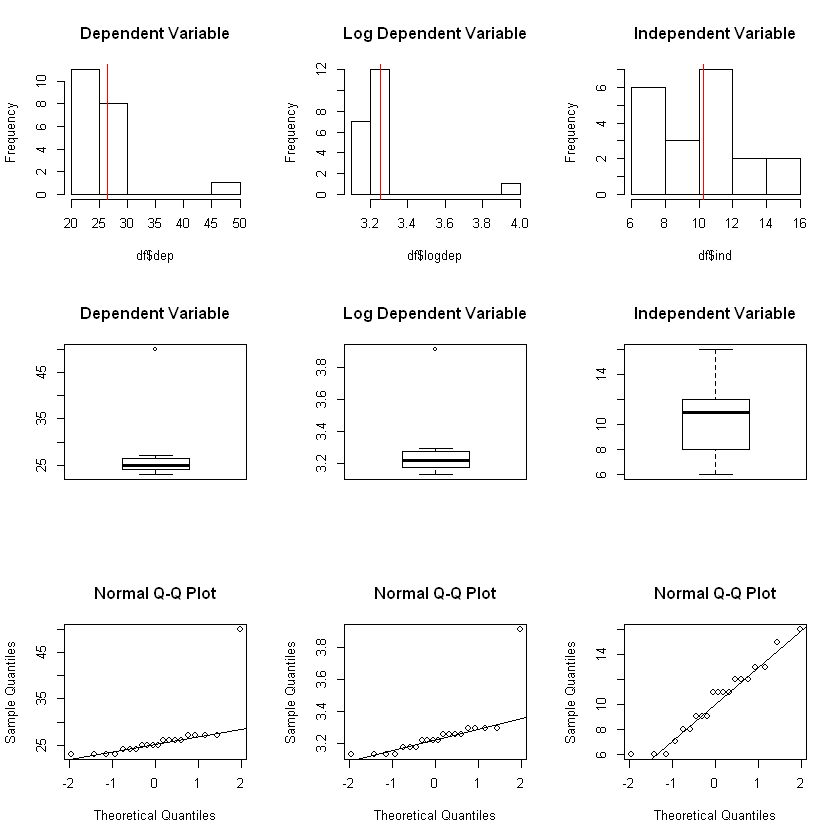

In [112]:
par(mfrow=c(3,3))
hist(df$dep, main="Dependent Variable")
abline(v=mean(df$dep),col="red")

hist(df$logdep, main="Log Dependent Variable")
abline(v=mean(df$logdep),col="red")

hist(df$ind,main="Independent Variable")
abline(v=mean(df$ind),col="red")

boxplot(df$dep, main="Dependent Variable")
boxplot(df$logdep, main="Log Dependent Variable")
boxplot(df$ind, main="Independent Variable")

qqnorm(df$dep); qqline(df$dep)
qqnorm(df$logdep); qqline(df$logdep)
qqnorm(df$ind); qqline(df$ind)

In [113]:
##Remove outlier from dep var
#out<-boxplot.stats(df$dep)$out
#df<-subset(df,df$dep<out)

#View summary of
summary(cbind(indep=df$ind,dep=df$dep,logdep=df$logdep))

     indep            dep            logdep     
 Min.   : 6.00   Min.   :23.00   Min.   :3.135  
 1st Qu.: 8.00   1st Qu.:24.00   1st Qu.:3.178  
 Median :11.00   Median :25.00   Median :3.219  
 Mean   :10.25   Mean   :26.30   Mean   :3.254  
 3rd Qu.:12.00   3rd Qu.:26.25   3rd Qu.:3.268  
 Max.   :16.00   Max.   :50.00   Max.   :3.912  

,indep,dep,logdep
indep,1.00000000,-0.16443640,-0.08842216
dep,-0.1644364,1.0000000,0.9945941
logdep,-0.08842216,0.99459411,1.00000000


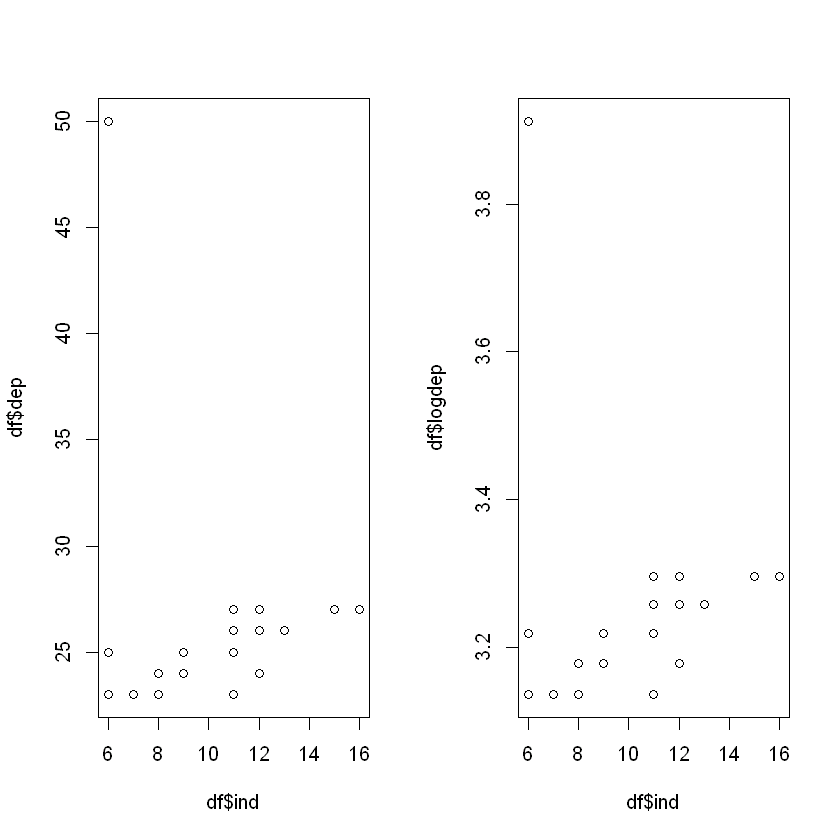

In [114]:
#Correlation coeff 
cor(cbind(indep=df$ind,dep=df$dep, logdep=df$logdep))

#Scatter Plot
par(mfrow=c(1,2))

#png(filename="D:/Data/scatter.png")
plot(df$ind,df$dep)
plot(df$ind,df$logdep)
#dev.off()

Warning message:
In par(fig = c(0, 0.8, 0, 0.8), new = TRUE): calling par(new=TRUE) with no plot

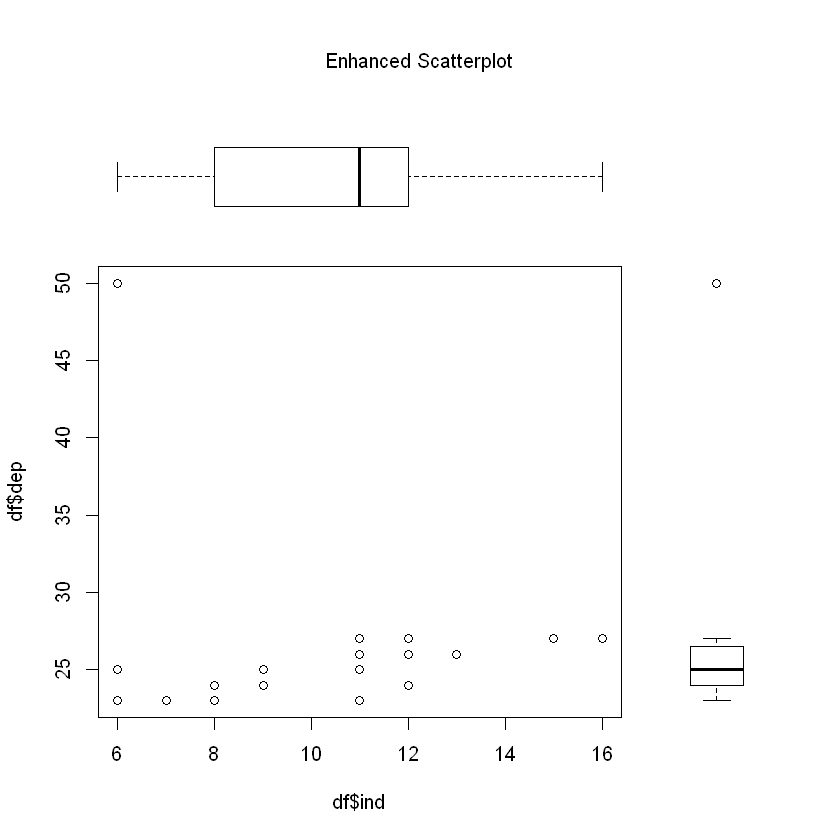

In [115]:
#Enhanced Scatter plot
# Add boxplots to a scatterplot
par(fig=c(0,0.8,0,0.8), new=TRUE)
plot(df$ind, df$dep)
#X Variable
par(fig=c(0,0.8,0.55,1), new=TRUE)
boxplot(df$ind, horizontal=TRUE, axes=FALSE)
# Y Variable
par(fig=c(0.65,1,0,0.8),new=TRUE)
boxplot(df$dep, axes=FALSE)
mtext("Enhanced Scatterplot", side=3, outer=TRUE, line=-3)

In [116]:
simpreg=lm(dep~ind,data=df)
logreg=lm(logdep~ind,data=df)

In [117]:
simpregsum<-summary(simpreg)
simpregsum


Call:
lm(formula = dep ~ ind, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6794 -2.7869 -1.3811  0.6803 22.3206 

Coefficients:
            Estimate Std. Error t value   Pr(>|t|)    
(Intercept)  29.6269     4.8815   6.069 0.00000978 ***
ind          -0.3246     0.4589  -0.707      0.488    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.836 on 18 degrees of freedom
Multiple R-squared:  0.02704,	Adjusted R-squared:  -0.02701 
F-statistic: 0.5002 on 1 and 18 DF,  p-value: 0.4885


In [118]:
logregsum<-summary(logreg)
logregsum


Call:
lm(formula = logdep ~ ind, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13975 -0.08343 -0.03635  0.02483  0.63678 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  3.305283   0.141393  23.377 0.00000000000000642 ***
ind         -0.005006   0.013292  -0.377               0.711    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1691 on 18 degrees of freedom
Multiple R-squared:  0.007818,	Adjusted R-squared:  -0.0473 
F-statistic: 0.1418 on 1 and 18 DF,  p-value: 0.7109


Warning message:
In predict.lm(simpreg, interval = "prediction"): predictions on current data refer to _future_ responses


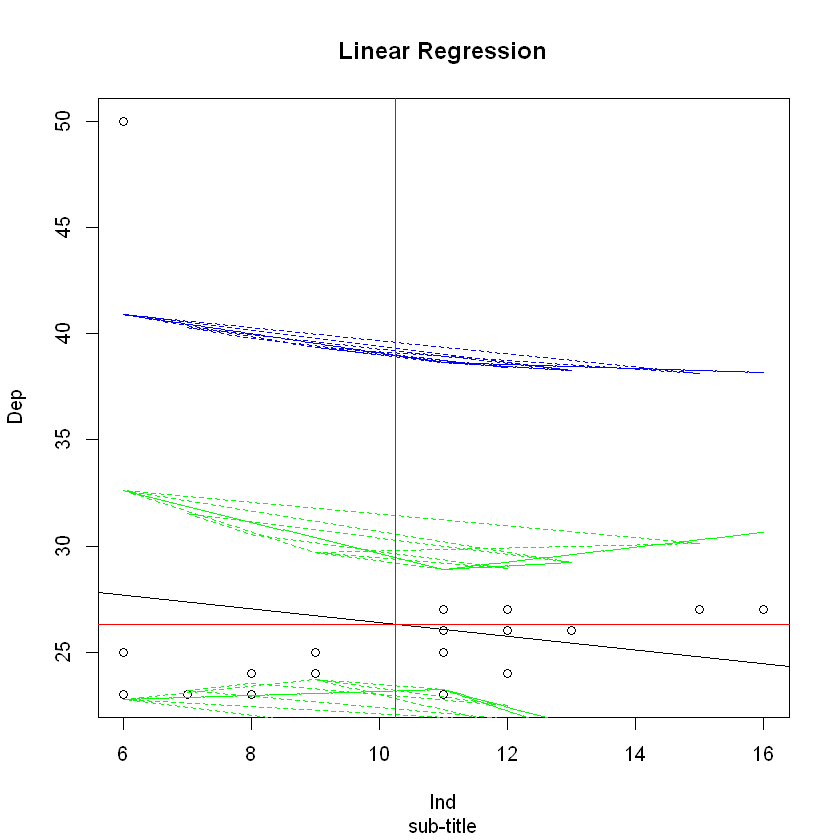

In [119]:
#Scatter Plot with regression line, confidence intervals and prediction intervals
plot(df$ind,df$dep,xlab="Ind", ylab="Dep")
abline(simpreg)
a <- predict(simpreg, interval="confidence") 
lines(df$ind, a[,2], lty=2, col="green")
lines(df$ind, a[,3], lty=2,col="green") 

b <- predict(simpreg, interval="prediction") 
lines(df$ind, b[,2], lty=2, col="blue")
lines(df$ind, b[,3], lty=2,col="blue") 

abline(h=mean(df$dep),col="red")
abline(v=mean(df$ind),col="red")

title(main="Linear Regression", sub="sub-title")

Warning message:
In predict.lm(logreg, interval = "prediction"): predictions on current data refer to _future_ responses


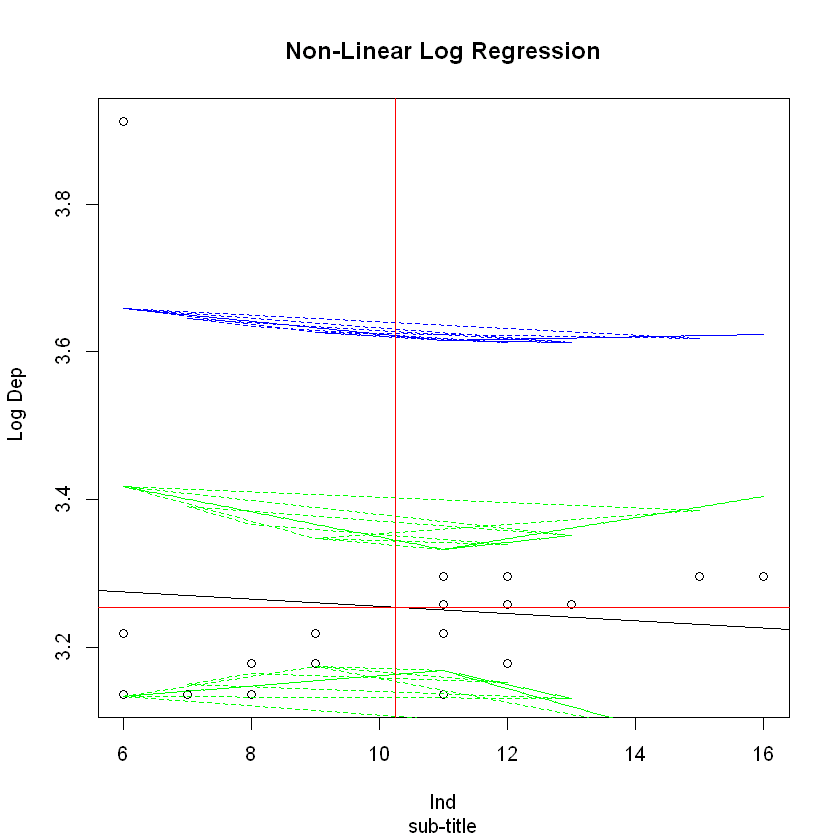

In [120]:
#Scatter Plot with regression line, confidence intervals and prediction intervals
plot(df$ind,df$logdep,xlab="Ind", ylab=" Log Dep")
abline(logreg)
a <- predict(logreg, interval="confidence") 
lines(df$ind, a[,2], lty=2, col="green")
lines(df$ind, a[,3], lty=2,col="green") 

b <- predict(logreg, interval="prediction") 
lines(df$ind, b[,2], lty=2, col="blue")
lines(df$ind, b[,3], lty=2,col="blue") 

abline(h=mean(df$logdep),col="red")
abline(v=mean(df$ind),col="red")

title(main="Non-Linear Log Regression", sub="sub-title")

In [121]:
anova(simpreg)
anova(logreg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ind,1,17.04019,17.04019,0.5002339,0.488454
Residuals,18,613.1598,34.06443,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ind,1,0.004053689,0.004053689,0.1418416,0.7108599
Residuals,18,0.5144218,0.02857899,NA,NA


In [122]:
## Get the coefficents and the 95% confidence intervals
print ("Coefficents and the 95% confidence intervals")
cbind(simpreg$coeff,confint(simpreg))

# CIs using standard errors
print ("Coefficents and the 95% confidence intervals Using Standard Error")
cbind(simpreg$coeff,confint.default(simpreg))

## Get the coefficents and the 95% confidence intervals
print ("Coefficents and the 95% confidence intervals")
cbind(logreg$coeff,confint(logreg))

# CIs using standard errors
print ("Coefficents and the 95% confidence intervals Using Standard Error")
cbind(logreg$coeff,confint.default(logreg))

[1] "Coefficents and the 95% confidence intervals"


,,2.5 %,97.5 %
(Intercept),29.62689,19.37119,39.88260
ind,-0.3245750,-1.2887111,0.6395612


[1] "Coefficents and the 95% confidence intervals Using Standard Error"


,,2.5 %,97.5 %
(Intercept),29.62689,20.05928,39.19451
ind,-0.324575,-1.224024,0.574874


[1] "Coefficents and the 95% confidence intervals"


,,2.5 %,97.5 %
(Intercept),3.305283,3.008227,3.602339
ind,-0.005006141,-0.032932300,0.022920018


[1] "Coefficents and the 95% confidence intervals Using Standard Error"


,,2.5 %,97.5 %
(Intercept),3.305283,3.028157,3.582408
ind,-0.005006141,-0.031058638,0.021046356


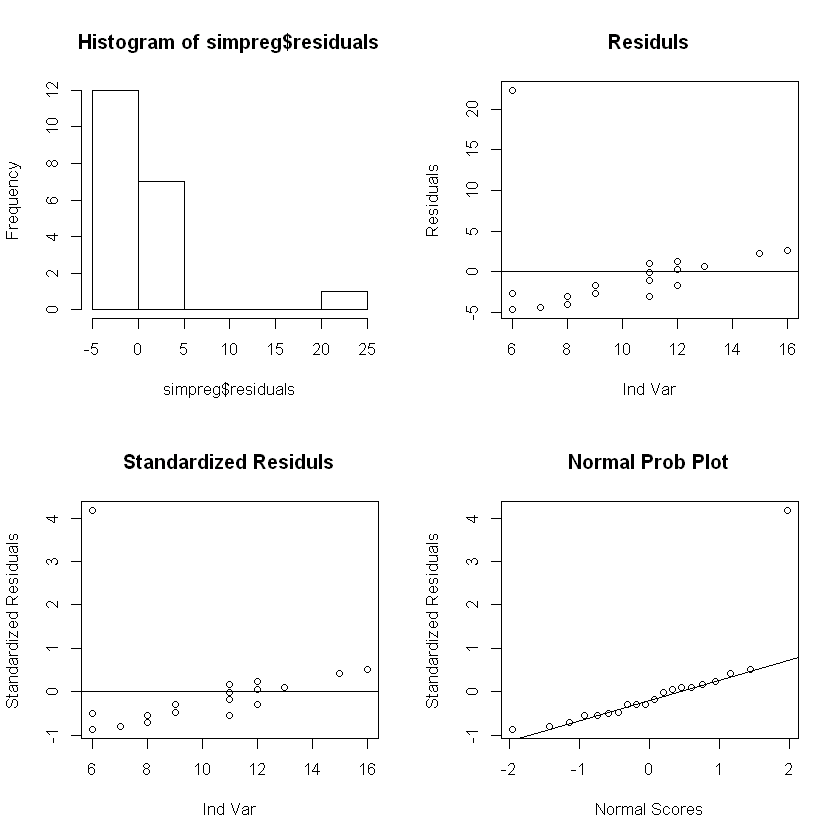

In [123]:
# Residual Plots
par(mfrow=c(2,2))

#png(filename="D:/Data/hist.png")
hist(simpreg$residuals)
#dev.off()

# Residuals
simpreg.res = resid(simpreg)
plot(df$ind, simpreg.res, ylab="Residuals", xlab="Ind Var", main="Residuls") 
abline(0, 0)

# Residuals
simpreg.stdres = rstandard(simpreg)
plot(df$ind, simpreg.stdres, ylab="Standardized Residuals", xlab="Ind Var", main="Standardized Residuls") 
abline(0, 0)

# Normal plot
qqnorm(simpreg.stdres,ylab="Standardized Residuals", xlab="Normal Scores", main="Normal Prob Plot") 
qqline(simpreg.stdres)

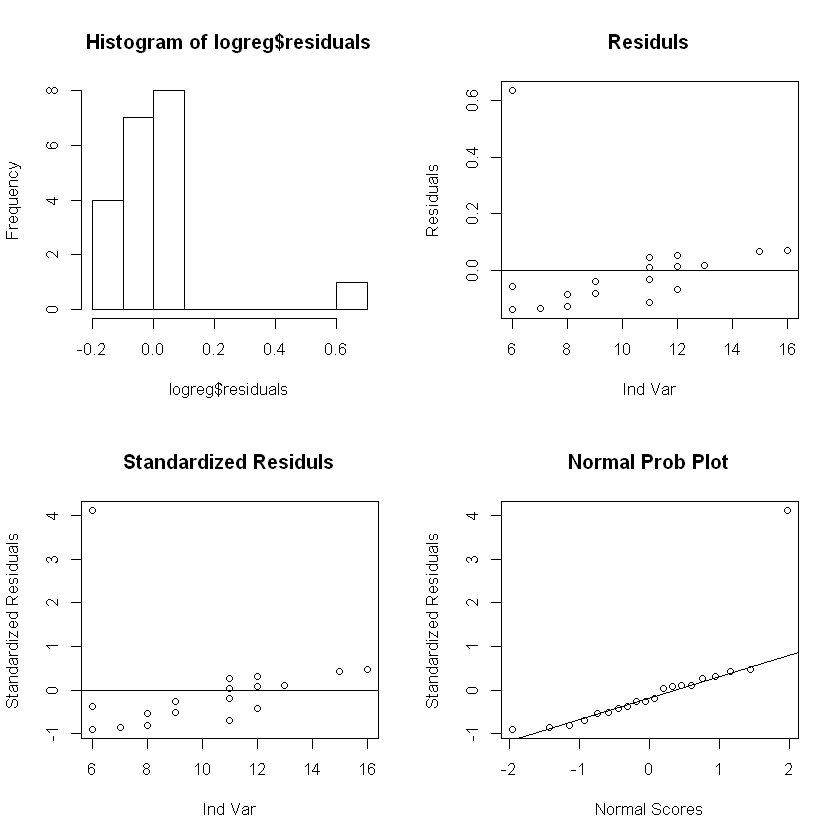

In [124]:
# Residual Plots Log Reg
par(mfrow=c(2,2))

hist(logreg$residuals)
# Residuals
logreg.res = resid(logreg)
plot(df$ind, logreg.res, ylab="Residuals", xlab="Ind Var", main="Residuls") 
abline(0, 0)

# Residuals
logreg.stdres = rstandard(logreg)
plot(df$ind, logreg.stdres, ylab="Standardized Residuals", xlab="Ind Var", main="Standardized Residuls") 
abline(0, 0)

# Normal plot
qqnorm(logreg.stdres,ylab="Standardized Residuals", xlab="Normal Scores", main="Normal Prob Plot") 
qqline(logreg.stdres)

In [125]:
#Predict with 95% confid intervals
new<-data.frame(ind=c(20:30))

#Generate Intervales
pred.conf <-predict(simpreg,new,interval = "confidence")
pred.pred <-predict(simpreg,new,interval = "prediction")
rbind(pred.conf,pred.pred)

#95% confident of prediction of 
cbind(confint.default(simpreg)[1,1]/2 - simpregsum$sigma, confint.default(simpreg)[1,2]/2 + simpregsum$sigma)

,fit,lwr,upr
1,23.13539,13.34336,32.92743
2,22.81082,12.08982,33.53182
3,22.48624,10.83056,34.14193
4,22.161669,9.566862,34.756477
5,21.837094,8.299647,35.374541
6,21.512519,7.029602,35.995437
7,21.187944,5.757247,36.618642
8,20.863369,4.482982,37.243757
9,20.538794,3.207122,37.870466
10,20.214219,1.929916,38.498523


4.193163,25.433730


In [126]:
#If used log for dependent variable
#Generate Intervales
predlog.conf <-predict(logreg,new,interval = "confidence")
predlog.pred <-predict(logreg,new,interval = "prediction")
exp(rbind(predlog.conf,predlog.pred))

,fit,lwr,upr
1,24.65945,18.56975,32.74617
2,24.53631,17.98648,33.47126
3,24.41378,17.41865,34.21808
4,24.29187,16.86657,34.98606
5,24.17056,16.33033,35.77492
6,24.04986,15.80984,36.58456
7,23.92977,15.30491,37.41503
8,23.81027,14.81529,38.26648
9,23.69137,14.34067,39.13910
10,23.57307,13.88072,40.03319


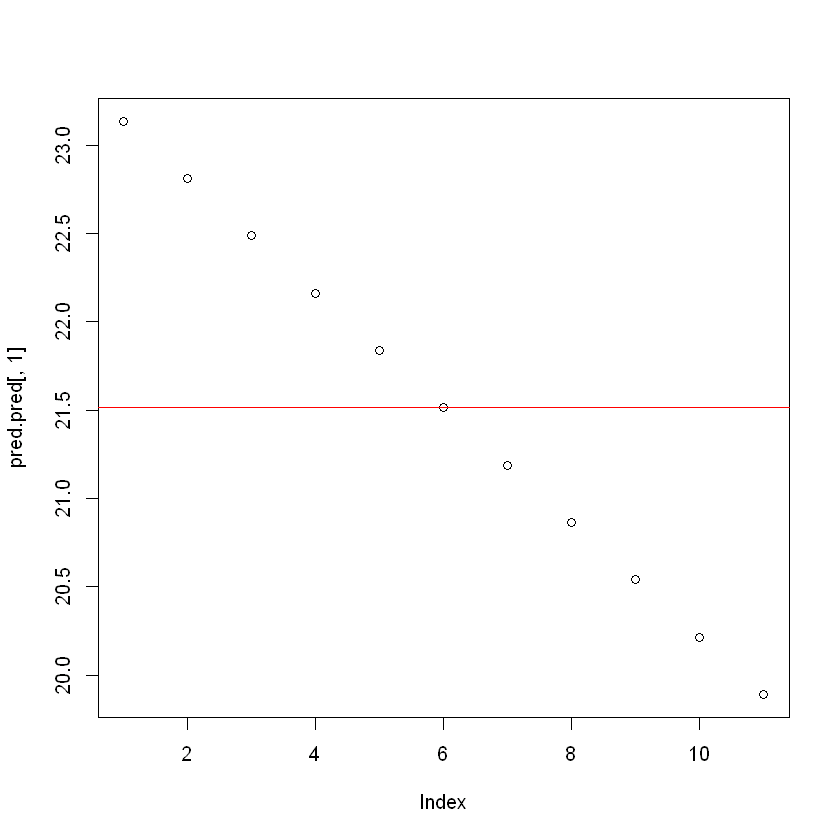

In [127]:
plot(pred.pred[,1])
lines(new[,1], pred.pred[,2], lty=2, col="green")
lines(new[,1], pred.pred[,3], lty=2, col="green")
lines(new[,1], pred.conf[,2], lty=2, col="blue")
lines(new[,1], pred.conf[,3], lty=2, col="blue")
abline(h=mean(pred.pred[,1]),col="red")
abline(v=mean(new[,1]),col="red")

